In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
dataframe = pd.read_csv('data.csv')

In [ ]:
dataframe

,X,Y
0,2.441256,-0.044710
1,0.313640,4.335086
2,1.895938,5.185403
3,-1.521727,3.234085
4,0.347138,3.451777
...,...,...
495,9.891518,-3.559564
496,-0.047492,5.474253
497,-2.697986,2.521947
498,-1.859490,2.635500


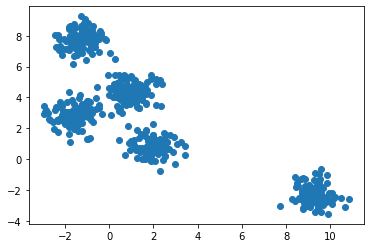

In [ ]:
plt.scatter(dataframe.X, dataframe.Y)

In [ ]:
dataframe = dataframe.sample(frac = 1)

In [ ]:
data = dataframe.to_numpy()

In [ ]:
def find_clusters(X, centers, k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for data in X:
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(data - centers[j]))
        clusters[distance.index(min(distance))].append(data)
    return clusters  

In [ ]:
def find_centers(centers, clusters, k):
    for i in range(k):
        centers[i] = np.average(clusters[i], axis=0)
    return centers

In [ ]:
def check_notequal(a,b):
  len_a = len(a)
  len_b = len(b)
  if len_a != len_b:
    return(True)
  else:
    for i in range(len_a):
      x = a[i]
      y = b[i]
      if len(x) != len(y):
        return(True)
      else:
        if (x==y).all():
          continue
        else:
          return(True)
    return(False)



In [ ]:
def k_means(X, k):
    centers = {}
    new_centers = {}
    c = 0
    for i in range(k):
        new_centers[i] = X[i]
        centers[i] = np.array([])
    while check_notequal(centers, new_centers): 
        c +=1
        centers = copy.deepcopy(new_centers)  
        clusters = find_clusters(X, new_centers, k)  
        new_centers = find_centers(new_centers, clusters, k) 
    return(centers, clusters, c)

number of iterations =  5


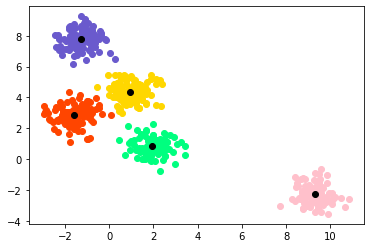

In [ ]:
k = 5

centers, clusters, c=  k_means(data, k)
print('number of iterations = ',c)
colors = ['orangered', 'slateblue' , 'springgreen', 'gold', 'pink']
plt.figure()  
for i in range(k):
    for cluster in clusters[i]:
        color = colors[i]
        plt.scatter(cluster[0], cluster[1], c=color)          
    plt.scatter(centers[i][0], centers[i][1], c='black')
  